# Use of clamp to replace chop in a neural network

The idea is to use clamp max value to simulate chop. 
bias is where the 1st line meets y-axis. if we want to stop 1st line (ie chop) at a certain value and start second line
instead of looking at x value as we did in chop we look at y coordinate of this point and use chop-max to stop the line
and then use the same y-point as bias for second line.

In [183]:
import torch
import torch.nn as nn

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

## Segment test implementation 

In [291]:
# function to simulate a 4 segment function
def f_segments(X, W, B):
    assert W.shape == B.shape, "Weights and biases should have same shape"
    
    Y = torch.zeros_like(X)
    C = torch.zeros(Weights.shape[0]-1)
    for i in (range(W.shape[0])):
        print("for i = ",i)
        Yn = W[i]*X + B[i]
        print("linear",Yn)
        if(i-1 >= 0): # Clamp X the begining
            # Create mask for X
            Mn = torch.ones_like(X)
            Mn = Mn.masked_fill((X < C[i-1]), 0)
            print("Mask min for Ci-1",C[i-1],Mn)
            Yn =  Yn*Mn
            print("Mask-min",Yn)
        if(i+1 < W.shape[0]):
            # if next line is parallel to previous line ignore it
            if W[i] == W[i+1]:
                continue
                
            C[i] = (B[i+1] - B[i])/(W[i] - W[i+1])
            Mn = torch.ones_like(X)
            Mn = Mn.masked_fill((X >= C[i]), 0)
            print("Mask min for Ci",C[i],Mn)
            Yn =  Yn*Mn
            print("Mask-max",Yn)
        Y += Yn
        print("Y=",Y)
    return Y

for i =  0
linear tensor([[ 0.],
        [ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.]])
Mask min for Ci tensor(2.6667) tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
Mask-max tensor([[0.],
        [2.],
        [4.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
Y= tensor([[0.],
        [2.],
        [4.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
for i =  1
linear tensor([[ 8.],
        [ 7.],
        [ 6.],
        [ 5.],
        [ 4.],
        [ 3.],
        [ 2.],
        [ 1.],
        [ 0.],
        [-1.]])
Mask min for Ci-1 tensor(2.6667) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Mask-min tensor([[ 0.]

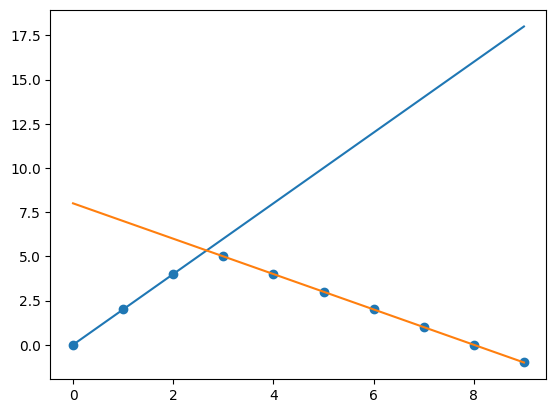

In [336]:
Weights = torch.Tensor([2., -1., 1.])
Biases =  torch.Tensor([0., 8., -10.])
X = torch.arange(0.,10).unsqueeze(-1) # unsqueeze(-1) converts shape (10,) to shape(10,1)

Y = f_segments(X, Weights, Biases)
plt.scatter(X,Y)

plt.plot(X, Weights[0]*X + Biases[0])
plt.plot(X, (Weights[1]*X + Biases[1]))

## One layer Segment Network implementation

In [329]:
class OneLayerSegmentNet(nn.Module):
    def __init__(self, in_features, segment_features):
        super(OneLayerSegmentNet, self).__init__()
        self.segment_features = segment_features
        self.in_features = in_features
        self.weight = nn.Parameter(torch.Tensor(segment_features, in_features))
        self.bias = nn.Parameter(torch.Tensor(segment_features))

        #Test initialization
        with torch.no_grad():
            self.weight.data = Weight
            self.bias.data = Bias
        #print(self.weight, self.bias)


    def forward(self, x):
        y = torch.zeros(x.shape[0],1)
        #intersections store the X coordinates for intersection of consecutive segments (lines from weights)
        intersections = torch.Tensor(self.segment_features-1)

        #TODO: replace for loop with matrix if possible and necessary for performance
        for i in range(self.segment_features):
            print("for i = ",i)
            yn = torch.matmul(x, self.weight[i]) + self.bias[i]
            yn = yn.unsqueeze(-1)
            #print("linear",yn.shape, yn)
            if(i+1 < self.segment_features): # clamp only N-1 segments in the end
                # if next line is parallel to previous line (no intersection) then ignore this
                if self.weight[i] == self.weight[i+1]:
                    continue
                    
                intersections[i] = (self.bias[i+1] - self.bias[i])/(self.weight[i] - self.weight[i+1])
                mask = torch.ones_like(x).masked_fill((x >= intersections[i]), 0)
                #print("Mask min for Ci",intersections[i],mask)
                #print(yn.shape, mask.shape)
                yn =  yn*mask
                #print("Mask-max",yn)
                
            if(i-1 >= 0): # Clamp X the beginning only second segment onwards
                # Create mask for X
                mask = torch.ones_like(x).masked_fill((x < intersections[i-1]), 0)
                #print("Mask min for intersections[i-1]",intersections[i-1],mask)
                yn =  yn*mask
                #print("Mask-min",yn)
            y += yn
            #print("Y=",y)
        print (intersections)
        return y

### Testing OneLayerSegmentNet

In [337]:
Weight = torch.Tensor([[2.], [-1.], [1]])
Bias =  torch.Tensor([0., 8., -10.])

In [295]:
criterion = nn.MSELoss(reduction='mean')

In [322]:
x = torch.arange(-5.,40).unsqueeze(-1) # unsqueeze(-1) converts shape (10,) to shape(10,1)
x.shape

torch.Size([45, 1])

In [339]:
n = OneLayerSegmentNet(1,Weight.shape[0])

In [340]:
y = n.forward(x)

for i =  0
for i =  1
for i =  2
tensor([2.6667, 9.0000], grad_fn=<CopySlices>)


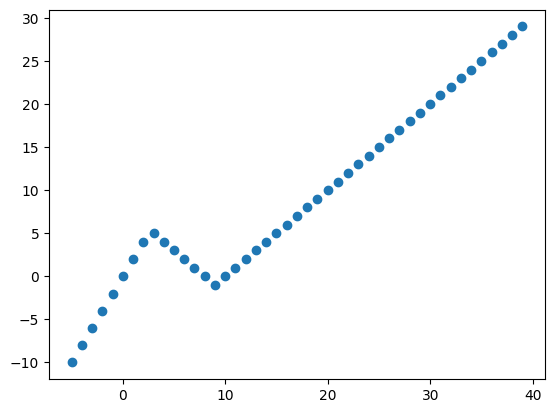

In [341]:
with torch.no_grad():
    plt.scatter(x,y)

In [299]:
loss = criterion(y, Y)

In [300]:
loss

tensor(0., grad_fn=<MseLossBackward0>)

In [280]:
from torchviz import make_dot


# Generate a Graphviz object from the computation graph
graph = make_dot(loss, params=dict(n.named_parameters())) 

# Save the graph as a PDF or any other format if needed
graph.render("segment_network_graph")

'segment_network_graph.pdf'